In [2]:
import pandas as pd
import numpy as np

# word2vec Gensim
from gensim.models import KeyedVectors
import gensim.downloader as api

# t-SNE visualization
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
# Load word2vec Turkish model trained on Turkish Wikipedia
# it can be downloaded from https://github.com/akoksal/Turkish-Word2Vec?tab=readme-ov-file

path_to_trmodel = '<path_to_saved_model>'
wv_tr = KeyedVectors.load_word2vec_format(path_to_trmodel, binary=True)

In [13]:
# Load word2vec English model trained on Google News dataset

wv_en = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [14]:
# List of words for comparison: cardinal numbers, demonstratives, colors, common nouns

num_tr = ['bir', 'iki', 'üç', 'dört', 'beş', 'altı', 'yedi', 'sekiz', 'dokuz', 'on']
num_en = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

dem_tr = ['bu', 'şu', 'bunlar', 'şunlar']
dem_en = ['this', 'that', 'these', 'those']

col_tr = ['kırmızı', 'mavi', 'sarı', 'yeşil', 'siyah', 'pembe', 'mor']
col_en = ['red', 'blue', 'yellow', 'green', 'black', 'pink', 'purple']

noun_tr = ['ekmek', 'süt', 'ev', 'kitap', 'telefon', 'çiçek']
noun_en = ['bread', 'milk', 'house', 'book', 'telephone', 'flower']

In [23]:
# Turkish embeddings

words_tr = num_tr + dem_tr + col_tr + noun_tr
class_tr = ['num'] * len(num_tr) + ['det'] * len(dem_tr) + ['color'] * len(col_tr) + ['noun'] * len(noun_tr)
X_tr = wv_tr[words_tr]
print('word2vec shape:', X_tr.shape)

tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3)
X_embedded_tr = tsne.fit_transform(X_tr)
print('word2vec compressed:', X_embedded_tr.shape)

word2vec shape: (27, 400)
word2vec compressed: (27, 2)


In [24]:
# English embeddings

words_en = num_en + dem_en + col_en + noun_en
class_en = ['num'] * len(num_en) + ['det'] * len(dem_en) + ['color'] * len(col_en) + ['noun'] * len(noun_en)
X_en = wv_en[words_en]
print('word2vec shape:', X_en.shape)

tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=3)
X_embedded_en = tsne.fit_transform(X_en)
print('word2vec compressed:', X_embedded_en.shape)

word2vec shape: (27, 300)
word2vec compressed: (27, 2)


In [25]:
df_en = pd.DataFrame({'words': words_en, 'x': X_embedded_en[:,0], 'y': X_embedded_en[:,1], 'class': class_en})
df_en.head()

,words,x,y,class
0,one,-2.051737,0.423281,num
1,two,-24.964424,31.842709,num
2,three,-27.924242,34.881359,num
3,four,-30.163700,37.106731,num
4,five,-33.492191,39.765278,num


In [26]:
df_tr = pd.DataFrame({'words': words_tr, 'x': X_embedded_tr[:,0], 'y': X_embedded_tr[:,1], 'class': class_tr})
df_tr.head()

,words,x,y,class
0,bir,-150.893707,-139.641037,num
1,iki,262.263947,60.954960,num
2,üç,258.992981,39.104645,num
3,dört,256.543610,22.408052,num
4,beş,256.907013,-8.858044,num


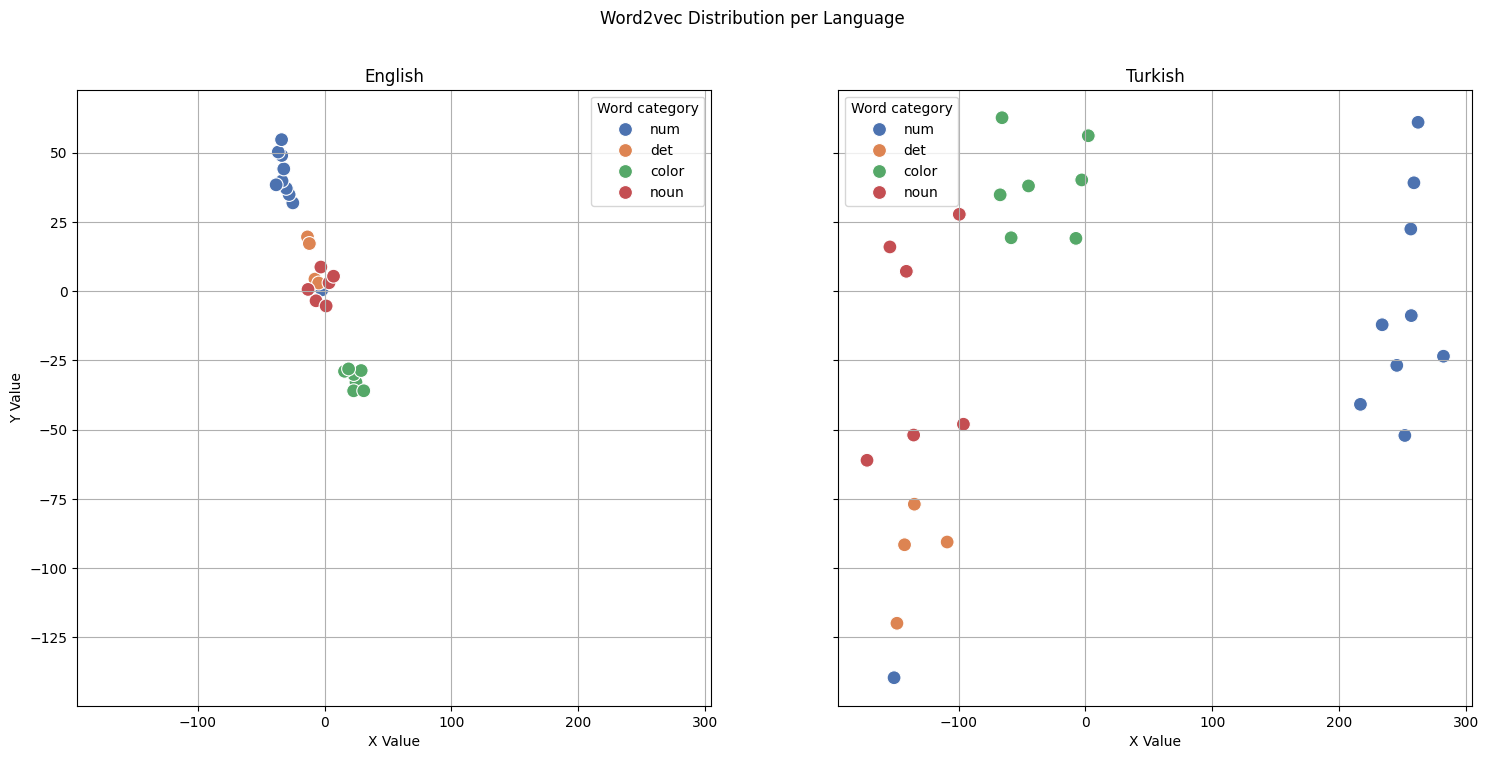

In [27]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
fig.suptitle('Word2vec Distribution per Language')

sns.scatterplot(ax=axes[0], data=df_en, x='x', y='y', hue='class', palette='deep', s=100)
axes[0].set_title('English')
axes[0].set_xlabel('X Value')
axes[0].set_ylabel('Y Value')
axes[0].legend(title='Word category')
axes[0].grid(True)

sns.scatterplot(ax=axes[1], data=df_tr, x='x', y='y', hue='class', palette='deep', s=100)
axes[1].set_title('Turkish')
axes[1].set_xlabel('X Value')
axes[1].set_ylabel('Y Value')
axes[1].legend(title='Word category')
axes[1].grid(True)

plt.show()

In [20]:
def compute_cosine_between_mean_vectors(class_lg, X_lg):
    # Vectors per category word
    class_vectors = {}
    for cls, vec in zip(class_lg, X_lg):
        if cls not in class_vectors:
            class_vectors[cls] = []
        class_vectors[cls].append(vec)

    # Mean vector per category word
    mean_vectors = {cls: np.mean(vectors, axis=0) for cls, vectors in class_vectors.items()}
    mean_vectors_df = pd.DataFrame(mean_vectors)

    # Cosine similarity between mean vectors
    cosine_sim = cosine_similarity(mean_vectors_df.T)
    cosine_sim_df = pd.DataFrame(cosine_sim, index=mean_vectors_df.columns, columns=mean_vectors_df.columns)

    # Print results
    for col in cosine_sim_df.columns:
        print(col.upper())
        print(cosine_sim_df[col].sort_values(ascending=False)[1:])
        print()

In [21]:
print('English')
compute_cosine_between_mean_vectors(class_en, X_en)

English
NUM
det      0.402255
noun     0.164403
color    0.150260
Name: num, dtype: float32

DET
num      0.402255
color    0.193469
noun     0.178510
Name: det, dtype: float32

COLOR
noun    0.209002
det     0.193469
num     0.150260
Name: color, dtype: float32

NOUN
color    0.209002
det      0.178510
num      0.164403
Name: noun, dtype: float32



In [22]:
print('Turkish')
compute_cosine_between_mean_vectors(class_tr, X_tr)

Turkish
NUM
det      0.362321
noun     0.232395
color    0.202675
Name: num, dtype: float32

DET
num      0.362321
noun     0.212059
color    0.171401
Name: det, dtype: float32

COLOR
noun    0.248518
num     0.202675
det     0.171401
Name: color, dtype: float32

NOUN
color    0.248518
num      0.232395
det      0.212059
Name: noun, dtype: float32

